In [1]:
from rljax.algorithm import DQN
from rljax.trainer import Trainer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from micro_price_trading.config import TWENTY_SECOND_DAY
from micro_price_trading import Preprocess, OptimalExecutionEnvironment

In [2]:
raw = Preprocess('TBT_TBF_data.csv', res_bin=6)
data = raw.process()

In [ ]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 5000
SEED = 0

env = OptimalExecutionEnvironment(
    data,
    risk_weights=(2, 1),
    trade_penalty=100,
    max_purchase=2,
    steps=TWENTY_SECOND_DAY,
    end_units_risk=TWENTY_SECOND_DAY*2,  # Ideally, this should be `TWENTY_SECOND_DAY//5*2`
    seed=SEED
)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-5,  # Have been messing around with this but doesn't seem to make a big difference
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=2500,
    seed=SEED,
)
trainer.train()

Num steps: 2500     Return: -4973.0   Time: 0:00:30


In [ ]:
env_test.plot('asset_paths')

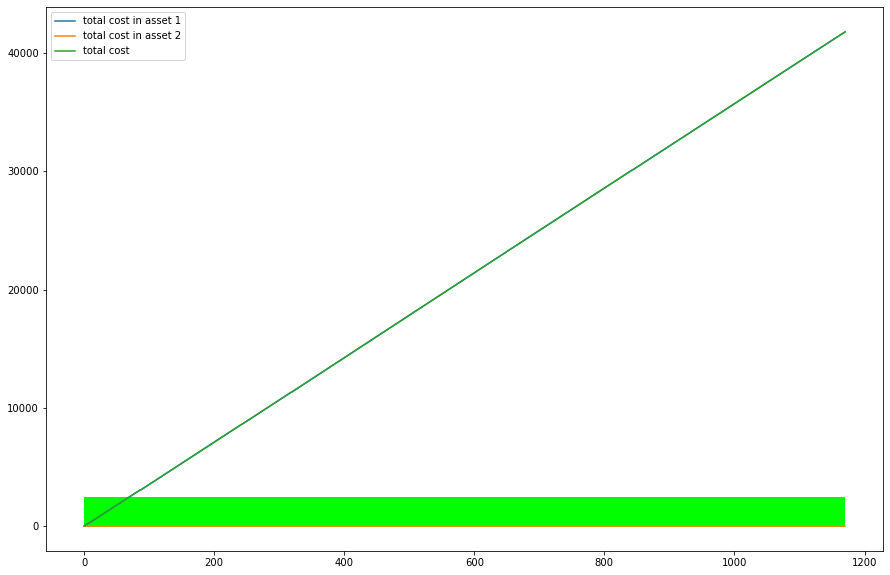

In [20]:
env_test.plot('extensive risk history')

#### Raw actions input by DQN before they are zero centered

In [4]:
env_test._raw_actions[-1]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


#### Rewards along with a flag for the type of reward

In [5]:
env_test._rewards[-1]

[(0.020000000000003126, 'actual'),
 (-0.160000000000025, 'actual'),
 (-0.32000000000005, 'risk penalty'),
 (-0.9600000000001501, 'risk penalty'),
 (-1.6000000000002501, 'risk penalty'),
 (-0.6400000000001, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.7600000000001188, 'risk penalty'),
 (-0.6400000000001, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),
 (-0.0, 'risk penalty'),


#### Raw observations seen by DQN

In [6]:
env_test._observations[-1]

[[12.0, 3, 6],
 [9.0, 2, 2],
 [9.0, 1, 0],
 [9.0, 0, 0],
 [9.0, 4, 0],
 [9.0, 3, 0],
 [9.0, 2, 0],
 [0.0, 1, 0],
 [19.0, 0, 0],
 [18.0, 4, 0],
 [9.0, 3, 0],
 [9.0, 2, 0],
 [9.0, 1, 0],
 [9.0, 0, 0],
 [9.0, 4, 0],
 [9.0, 3, 0],
 [10.0, 2, 0],
 [16.0, 1, 0],
 [16.0, 0, 0],
 [25.0, 4, 0],
 [26.0, 3, 0],
 [26.0, 2, 0],
 [29.0, 1, 0],
 [29.0, 0, 0],
 [28.0, 4, 0],
 [28.0, 3, 0],
 [28.0, 2, 0],
 [22.0, 1, 0],
 [22.0, 0, 0],
 [19.0, 4, 0],
 [19.0, 3, 0],
 [19.0, 2, 0],
 [19.0, 1, 0],
 [19.0, 0, 0],
 [19.0, 4, 0],
 [19.0, 3, 0],
 [16.0, 2, 0],
 [16.0, 1, 0],
 [16.0, 0, 0],
 [25.0, 4, 0],
 [22.0, 3, 0],
 [22.0, 2, 0],
 [25.0, 1, 0],
 [25.0, 0, 0],
 [25.0, 4, 0],
 [25.0, 3, 0],
 [25.0, 2, 0],
 [25.0, 1, 0],
 [25.0, 0, 0],
 [25.0, 4, 0],
 [25.0, 3, 0],
 [25.0, 2, 0],
 [25.0, 1, 0],
 [25.0, 0, 0],
 [25.0, 4, 0],
 [25.0, 3, 0],
 [31.0, 2, 0],
 [12.0, 1, 0],
 [15.0, 0, 0],
 [16.0, 4, 0],
 [16.0, 3, 0],
 [19.0, 2, 0],
 [19.0, 1, 0],
 [19.0, 0, 0],
 [19.0, 4, 0],
 [19.0, 3, 0],
 [19.0, 2, 0],
 [19.0, 

### Raw format for accessing the portfolio history
Should ideally be gotten by `env_test.portfolio_history`

## FOR SOME REASON, THE LENGTH OF THIS IS NOWHERE NEAR WHAT IT SHOULD BE FOR THE BASE TRAINING ENV. I AM GETTING AROUND 17 ENTRIES FOR IT BUT THE ENV_TEST SEEMS TO BE CORRECT

In [7]:
env_test._portfolios[3][-1]

Portfolio(time=1170, cash=-41275.55999999973, shares=(2336, 2), prices=(17.554999999999964, 16.435000000000002), total_risk=4674, res_imbalance_state='200', trade=Trade(asset=1, shares=2, risk=4, price=17.554999999999964, cost=35.10999999999993, penalty=False), penalty_trade=None)

In [8]:
env_test.end_units_risk

2340

In [9]:
env_test._period_risk.get(5, env_test.end_units_risk)

2330

In [10]:
env_test.end_units_risk - env_test.current_portfolio.total_risk

-2328

In [11]:
env_test.prices_at_start

array([17.835, 16.395])

In [12]:
# print(env_test.step(2))
# env_test._portfolios[-1][-1]

### Not sure this plot is fully correct, when the shares hit this line perfectly, they fail to hit the risk plot perfectly. This also happens in reverse

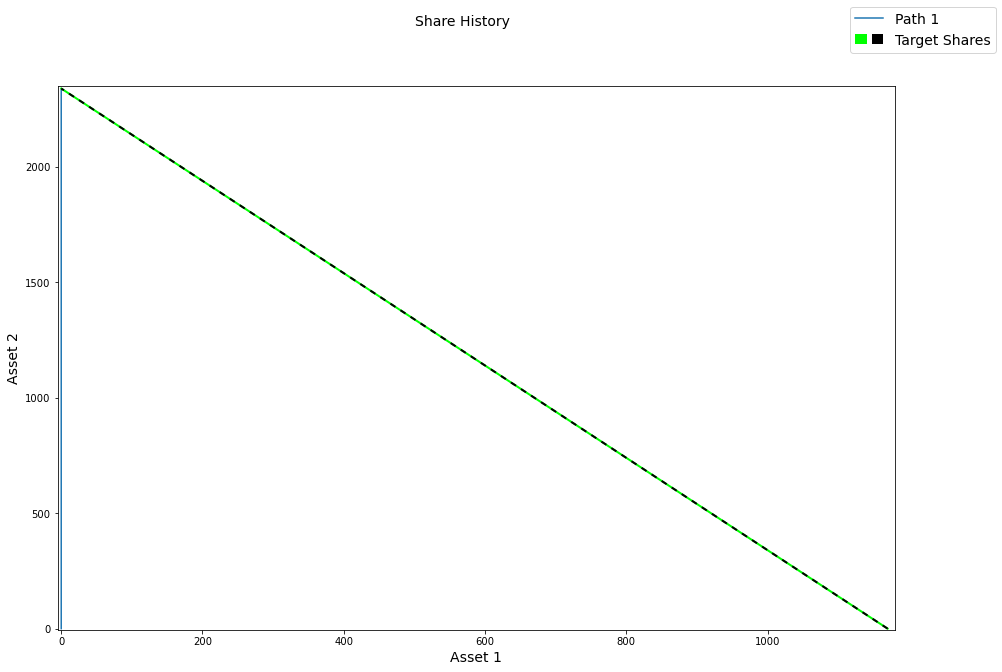

In [13]:
env_test.plot()

### Case and point, shares hit well but risk doesn't

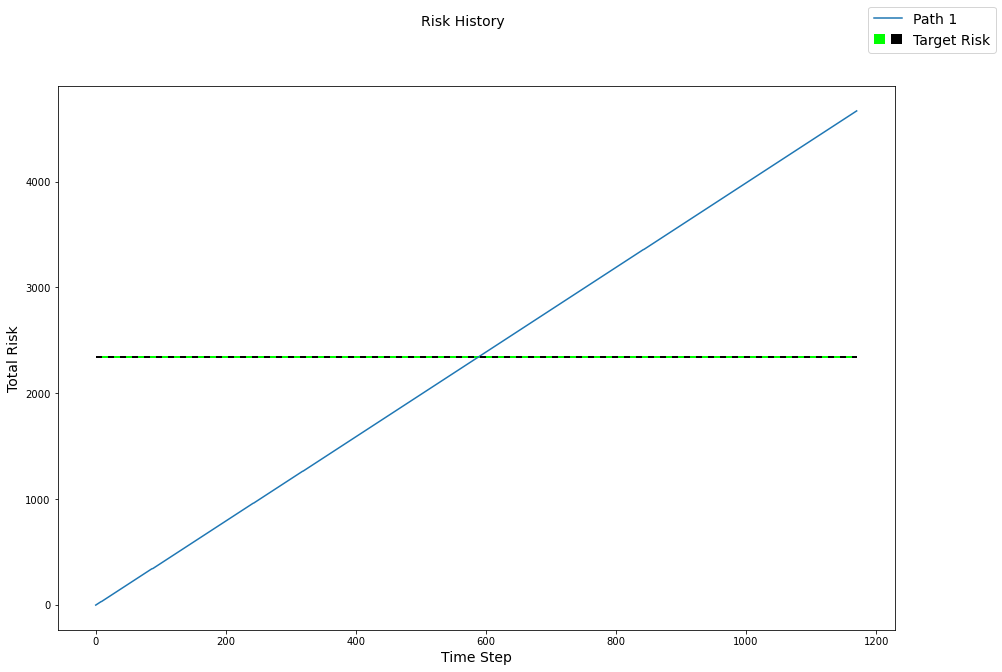

In [14]:
env_test.plot('risk_history')

### Count number of chosen trades
Can use `len([p.time for p in env_test.portfolio_history[-1] if (p.trade or p.penalty_trade)])` for all trades or `len([p.time for p in env_test.portfolio_history[-1] if (p.penalty_trade)])` for the penalty trades

In [15]:
len([p.time for p in env_test.portfolio_history[-1] if (p.trade)])

1170

### Changes the `env_test._period_risk` dictionary to have the amount of risk we should have bought instead of the amount of risk remaining

In [16]:
dict(zip(env_test._period_risk.keys(), env_test.end_units_risk-np.array(list(env_test._period_risk.values()))))

{5: 10,
 10: 20,
 15: 30,
 20: 40,
 25: 50,
 30: 60,
 35: 70,
 40: 80,
 45: 90,
 50: 100,
 55: 110,
 60: 120,
 65: 130,
 70: 140,
 75: 150,
 80: 160,
 85: 170,
 90: 180,
 95: 190,
 100: 200,
 105: 210,
 110: 220,
 115: 230,
 120: 240,
 125: 250,
 130: 260,
 135: 270,
 140: 280,
 145: 290,
 150: 300,
 155: 310,
 160: 320,
 165: 330,
 170: 340,
 175: 350,
 180: 360,
 185: 370,
 190: 380,
 195: 390,
 200: 400,
 205: 410,
 210: 420,
 215: 430,
 220: 440,
 225: 450,
 230: 460,
 235: 470,
 240: 480,
 245: 490,
 250: 500,
 255: 510,
 260: 520,
 265: 530,
 270: 540,
 275: 550,
 280: 560,
 285: 570,
 290: 580,
 295: 590,
 300: 600,
 305: 610,
 310: 620,
 315: 630,
 320: 640,
 325: 650,
 330: 660,
 335: 670,
 340: 680,
 345: 690,
 350: 700,
 355: 710,
 360: 720,
 365: 730,
 370: 740,
 375: 750,
 380: 760,
 385: 770,
 390: 780,
 395: 790,
 400: 800,
 405: 810,
 410: 820,
 415: 830,
 420: 840,
 425: 850,
 430: 860,
 435: 870,
 440: 880,
 445: 890,
 450: 900,
 455: 910,
 460: 920,
 465: 930,
 470: 

In [17]:
list(zip(env_test._rewards[-1], env_test.portfolio_history[-1]))

[((0.020000000000003126, 'actual'),
  Portfolio(time=0, cash=0, shares=(0, 0), prices=(17.724999999999984, 16.344999999999988), total_risk=0, res_imbalance_state='311', trade=None, penalty_trade=None)),
 ((-0.160000000000025, 'actual'),
  Portfolio(time=1, cash=-35.44999999999997, shares=(2, 0), prices=(17.814999999999998, 16.435000000000002), total_risk=4, res_imbalance_state='110', trade=Trade(asset=1, shares=2, risk=4, price=17.724999999999984, cost=35.44999999999997, penalty=False), penalty_trade=None)),
 ((-0.32000000000005, 'risk penalty'),
  Portfolio(time=2, cash=-71.07999999999996, shares=(4, 0), prices=(17.814999999999998, 16.435000000000002), total_risk=8, res_imbalance_state='100', trade=Trade(asset=1, shares=2, risk=4, price=17.814999999999998, cost=35.629999999999995, penalty=False), penalty_trade=None)),
 ((-0.9600000000001501, 'risk penalty'),
  Portfolio(time=3, cash=-106.70999999999995, shares=(6, 0), prices=(17.814999999999998, 16.435000000000002), total_risk=12, res

In [18]:
env_test._observations[-1]

[[12.0, 3, 6],
 [9.0, 2, 2],
 [9.0, 1, 0],
 [9.0, 0, 0],
 [9.0, 4, 0],
 [9.0, 3, 0],
 [9.0, 2, 0],
 [0.0, 1, 0],
 [19.0, 0, 0],
 [18.0, 4, 0],
 [9.0, 3, 0],
 [9.0, 2, 0],
 [9.0, 1, 0],
 [9.0, 0, 0],
 [9.0, 4, 0],
 [9.0, 3, 0],
 [10.0, 2, 0],
 [16.0, 1, 0],
 [16.0, 0, 0],
 [25.0, 4, 0],
 [26.0, 3, 0],
 [26.0, 2, 0],
 [29.0, 1, 0],
 [29.0, 0, 0],
 [28.0, 4, 0],
 [28.0, 3, 0],
 [28.0, 2, 0],
 [22.0, 1, 0],
 [22.0, 0, 0],
 [19.0, 4, 0],
 [19.0, 3, 0],
 [19.0, 2, 0],
 [19.0, 1, 0],
 [19.0, 0, 0],
 [19.0, 4, 0],
 [19.0, 3, 0],
 [16.0, 2, 0],
 [16.0, 1, 0],
 [16.0, 0, 0],
 [25.0, 4, 0],
 [22.0, 3, 0],
 [22.0, 2, 0],
 [25.0, 1, 0],
 [25.0, 0, 0],
 [25.0, 4, 0],
 [25.0, 3, 0],
 [25.0, 2, 0],
 [25.0, 1, 0],
 [25.0, 0, 0],
 [25.0, 4, 0],
 [25.0, 3, 0],
 [25.0, 2, 0],
 [25.0, 1, 0],
 [25.0, 0, 0],
 [25.0, 4, 0],
 [25.0, 3, 0],
 [31.0, 2, 0],
 [12.0, 1, 0],
 [15.0, 0, 0],
 [16.0, 4, 0],
 [16.0, 3, 0],
 [19.0, 2, 0],
 [19.0, 1, 0],
 [19.0, 0, 0],
 [19.0, 4, 0],
 [19.0, 3, 0],
 [19.0, 2, 0],
 [19.0, 

In [19]:
plt.plot(np.cumsum(env_test._rewards[-1]))

TypeError: cannot perform accumulate with flexible type

In [ ]:
import numpy as np

In [ ]:
env_test.risk_history[-1]

In [ ]:
set(np.gradient(env_test.risk_history[-1]))

In [ ]:
env_test.portfolio_history

In [ ]:
np.argwhere(env_test.risk_history[-1] > env_test.end_units_risk)